### Project Libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

### Reading the data

In [2]:
df = pd.read_csv(r"../data/boavizta-data-us.csv")

### Showcasing some useful information for better understanding of the data

In [3]:
df.head(3)

,manufacturer,name,category,subcategory,gwp_total,gwp_use_ratio,yearly_tec,lifetime,use_location,report_date,...,added_date,add_method,gwp_transport_ratio,gwp_eol_ratio,gwp_electronics_ratio,gwp_battery_ratio,gwp_hdd_ratio,gwp_ssd_ratio,gwp_othercomponents_ratio,comment
0,Apple,13-inch MacBook Air (M1 CPU) 256GB - 2020,Workplace,Laptop,161.0,0.15,NaN,3.0,WW,November 2020,...,27-05-2022,Manual,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,13-inch MacBook Air (M1 CPU) 512GB - 2020,Workplace,Laptop,181.0,0.15,NaN,3.0,WW,November 2020,...,27-05-2022,Manual,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,13-inch MacBook Air with Retina display (1.1GH...,Workplace,Laptop,174.0,0.15,NaN,3.0,WW,March 2020,...,01-11-2020,Initial Parsing,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer               1226 non-null   object 
 1   name                       1226 non-null   object 
 2   category                   1226 non-null   object 
 3   subcategory                1226 non-null   object 
 4   gwp_total                  1226 non-null   float64
 5   gwp_use_ratio              1151 non-null   float64
 6   yearly_tec                 734 non-null    float64
 7   lifetime                   1193 non-null   float64
 8   use_location               1113 non-null   object 
 9   report_date                1211 non-null   object 
 10  sources                    1226 non-null   object 
 11  sources_hash               1226 non-null   object 
 12  gwp_error_ratio            1022 non-null   float64
 13  gwp_manufacturing_ratio    757 non-null    float

In [5]:
df.columns

Index(['manufacturer', 'name', 'category', 'subcategory', 'gwp_total',
       'gwp_use_ratio', 'yearly_tec', 'lifetime', 'use_location',
       'report_date', 'sources', 'sources_hash', 'gwp_error_ratio',
       'gwp_manufacturing_ratio', 'weight', 'assembly_location', 'screen_size',
       'server_type', 'hard_drive', 'memory', 'number_cpu', 'height',
       'added_date', 'add_method', 'gwp_transport_ratio', 'gwp_eol_ratio',
       'gwp_electronics_ratio', 'gwp_battery_ratio', 'gwp_hdd_ratio',
       'gwp_ssd_ratio', 'gwp_othercomponents_ratio', 'comment'],
      dtype='object')

### Cleaning the data
1. Dropping some columns that will not be used for the analysis

In [6]:
df.drop(columns = ['sources', 'server_type', 'hard_drive', 'memory', 'number_cpu', 'height', 'added_date', 'add_method'], inplace=True)

## MANUFACTURERS
- Focus: Emissions reduction, lifecycle design and production optimization.

#### The function bellow is being used to evaluate the Strength of the tests. 👇

In [7]:
def evaluating_strength(correlation_coefficient):
    abs_r = abs(correlation_coefficient)
    if correlation_coefficient == 0:
        return "No correlation"
    elif 0 < abs_r < 0.3:
        return "Weak correlation (linear relationship is very weak or negligible)"
    elif 0.3 <= abs_r < 0.5:
        return "Moderate correlation"
    elif 0.5 <= abs_r < 0.7:
        return "Strong correlation"
    elif 0.7 <= abs_r < 1:
        return "Very strong correlation"
    elif abs_r == 1:
        return "Perfect correlation"
    else:
        return "Invalid value for r"

| Hypothesis                                                                | Variables(s) Involved               | Variable Types         | Tests                  |
|---------------------------------------------------------------------------|-------------------------------------|------------------------|-------------------------|
| (H1) Higher product weight correlates with higher manufacturing emissions | `weight`, `gwp_manufacturing_ratio` | Continuous/ Continuous |Pearson correlation test |

In [8]:
df.groupby('subcategory')['weight'].apply(lambda x: x.isna().all())

subcategory
Converged         False
Converged Edge    False
Desktop           False
Entertainment      True
EntertainmentT     True
Gaming            False
Hard drive         True
IoT               False
Laptop            False
Monitor           False
Multimedia        False
Network           False
Printer            True
SAN/NAS            True
Server            False
Smartphone        False
Tablet            False
Thin Client       False
Thin client       False
Workstation        True
Name: weight, dtype: bool

In [9]:
df.groupby('subcategory')['gwp_manufacturing_ratio'].apply(lambda x: x.isna().all())

subcategory
Converged         False
Converged Edge    False
Desktop           False
Entertainment      True
EntertainmentT    False
Gaming            False
Hard drive         True
IoT               False
Laptop            False
Monitor           False
Multimedia        False
Network           False
Printer            True
SAN/NAS            True
Server            False
Smartphone        False
Tablet            False
Thin Client       False
Thin client       False
Workstation       False
Name: gwp_manufacturing_ratio, dtype: bool

- The subcategories marked as `True` above 👆 indicate cases where all `weight` and `gwp_manufacturing_ratio` values are missing.

In [10]:
x = df['weight'].isnull().sum()
xx = df['gwp_manufacturing_ratio'].isnull().sum()
print(x, xx)

191 469


- To handle the missing values in the columns shown above 👆, we will fill them using the mean value within each respective subcategory. However, in some subcategories, all entries for weight and gwp_manufacturing_ratio are null. In such cases, we will use the average values calculated at the category level 👇 to fill the remaining missing data.

In [11]:
## Subcategory
df['weight'] = df['weight'].fillna(df.groupby('subcategory')['weight'].transform('mean'))

df['gwp_manufacturing_ratio'] = df['gwp_manufacturing_ratio'].fillna(df.groupby('subcategory')['gwp_manufacturing_ratio'].transform('mean'))

# Number of missing data
x = df['weight'].isnull().sum()
xx = df['gwp_manufacturing_ratio'].isnull().sum()
print(x, xx)

29 24


In [12]:
## Category
df['weight'] = df['weight'].fillna(df.groupby('category')['weight'].transform('mean'))

df['gwp_manufacturing_ratio'] = df['gwp_manufacturing_ratio'].fillna(df.groupby('category')['gwp_manufacturing_ratio'].transform('mean'))

# Number of missing data
x = df['weight'].isnull().sum()
xx = df['gwp_manufacturing_ratio'].isnull().sum()
print(x, xx)

0 0


In [13]:
r1, p1 = stats.pearsonr(df['weight'], df['gwp_manufacturing_ratio'])

print (f"\nPearson correlation coefficient(r)    -> {r1}\n{evaluating_strength(r1)}\nPvalue     ->{p1:.4f}")


Pearson correlation coefficient(r)    -> -0.42449000501191486
Moderate correlation
Pvalue     ->0.0000


- Pearson R = -0.42
    - Indicates a moderate negative correlation: as the product weight increases, the share of emissions from manufacturing tends to decrease.

- P-value = 0
    - The correlation is statistically significant, meaning it’s very unlikely to have occurred by chance.

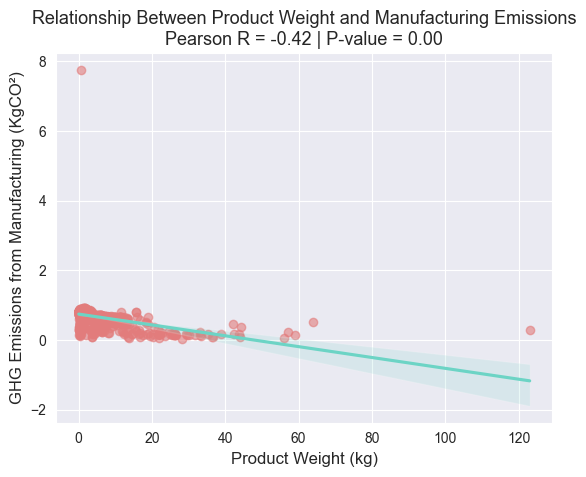

In [14]:
sns.regplot(x='weight', y='gwp_manufacturing_ratio', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Relationship Between Product Weight and Manufacturing Emissions\nPearson R = {r1:.2f} | P-value = {p1:.2f}', fontsize=13)
plt.xlabel('Product Weight (kg)', fontsize=12)
plt.ylabel('GHG Emissions from Manufacturing (KgCO²)', fontsize=12)
plt.show()

Lighter products tend to have a larger portion of their carbon footprint coming from the manufacturing phase, while heavier products likely have a more balanced emission distribution across other phases like usage and transportation.

__MANUFACTURERS__ Should focus on optimizing the manufacturing process for lightweight devices, since this phase contributes proportionally more to their emissions.

| Hypothesis                                                                | Variables(s) Involved               | Variable Types         | Tests                  |
|---------------------------------------------------------------------------|-------------------------------------|------------------------|-------------------------|
| (H2) Devices from different manufacturers have different average GHG emissions.| `manufacturer`, `gwp_total` | Nominal/ Continuous |ANOVA |

- Checking if there's any null value is those variables

In [39]:
x = df['manufacturer'].isnull().sum()
xx = df['gwp_total'].isnull().sum()
print(x, xx)

0 0


In [43]:
from scipy.stats import f_oneway

groups = [g['gwp_total'] for _, g in df.groupby('manufacturer')]
f, p = f_oneway(*groups)

print(f"F = {f:.2f}, p-value = {p:.4f}")

F = 11.04, p-value = 0.0000
